In [69]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.pyplot as plt
import sklearn as sk

from IPython.display import Image  
import pydotplus

# Reading and Parsing Data

In [71]:
train = pd.read_csv("./data/train.csv")  
test = pd.read_csv("./data/test.csv")
x_data = train.drop('Activity', 1)
y_data = train['Activity']
x_test = test.drop('Activity', 1)
y_test = test['Activity']

# KNN

In [72]:
n_neighbors = 15
h = .02

knn = sk.neighbors.KNeighborsClassifier(n_neighbors)
knn.fit(x_data, y_data)
pred = knn.predict(x_test)
print(sk.metrics.accuracy_score(y_test, pred))

0.815066168985


# SVM

In [67]:
clf = sk.svm.SVC()
clf.fit(x_data, y_data)  
pred1 = clf.predict(x_test)
print(sk.metrics.accuracy_score(y_test, pred1))

0.930777061418


# Tree-Based

In [79]:
clf1 = sk.tree.DecisionTreeClassifier()
clf1 = clf1.fit(x_data, y_data)
pred2 = clf1.predict(x_test)
print(sk.metrics.accuracy_score(y_test, pred2))

0.860536138446


### Visualizing Tree-Based

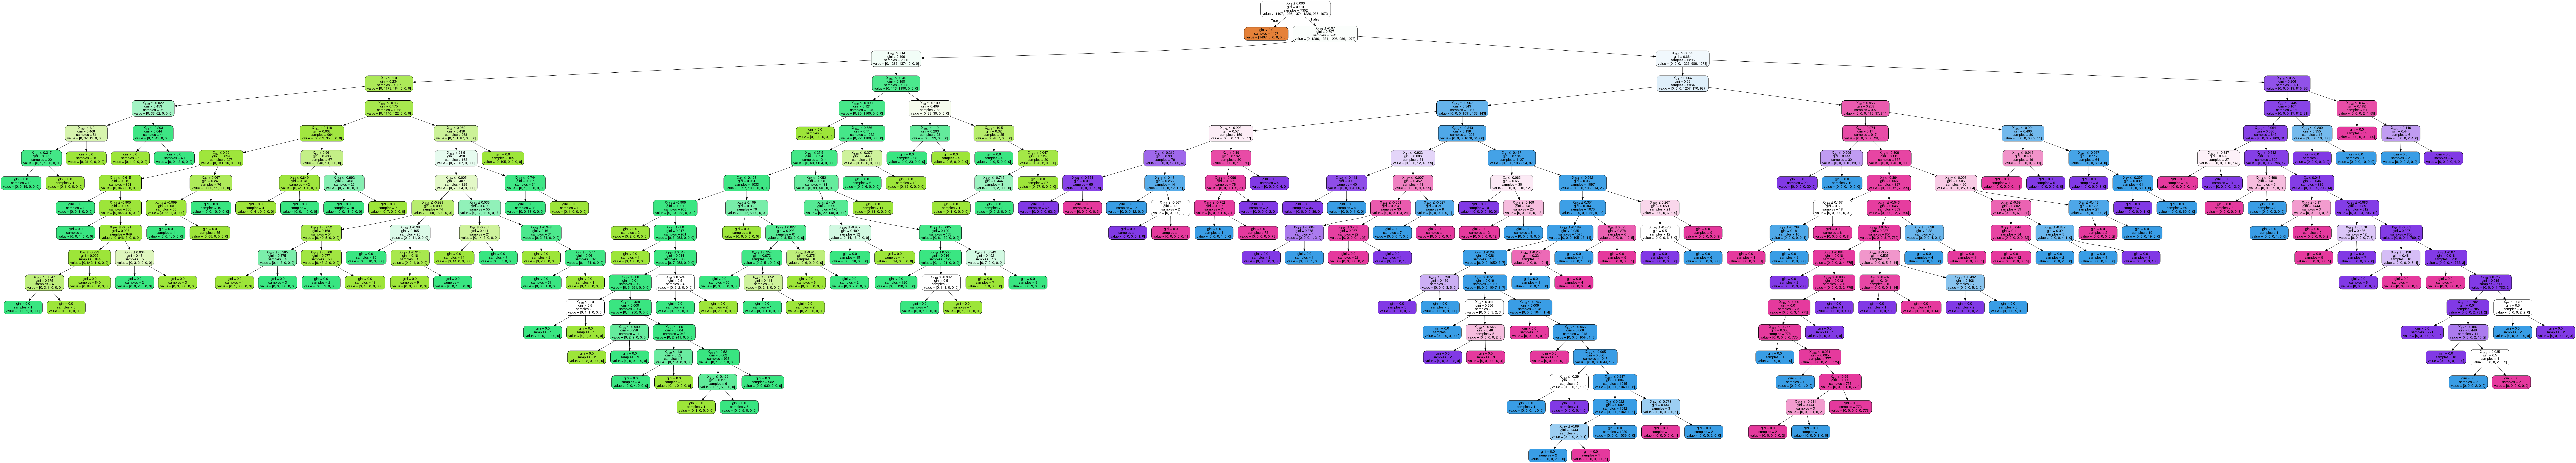

In [80]:
dot_data = sk.externals.six.StringIO()

sk.tree.export_graphviz(clf1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# Splitting Up Time and Frequency Data

In [74]:
frequency = [col for col in train if col.startswith('f')]
time = [col for col in train if col.startswith('t')]
freq_x_data = train[frequency]
time_x_data = train[time]
freq_x_test = test[frequency]
time_x_test = test[time]

y_data = train['Activity']
y_test = test['Activity']

### KNN

In [75]:
n_neighbors = 15
h = .02

knn = sk.neighbors.KNeighborsClassifier(n_neighbors)
knn.fit(freq_x_data, y_data)
pred = knn.predict(freq_x_test)
print(sk.metrics.accuracy_score(y_test, pred))

knn.fit(time_x_data, y_data)
pred = knn.predict(time_x_test)
print(sk.metrics.accuracy_score(y_test, pred))

0.791652527995
0.882253138785


### SVM

In [76]:
clf = sk.svm.SVC(decision_function_shape='ovo')
clf.fit(freq_x_data, y_data)  
pred1 = clf.predict(freq_x_test)
print(sk.metrics.accuracy_score(y_test, pred1))

clf = sk.svm.SVC(decision_function_shape='ovo')
clf.fit(time_x_data, y_data)  
pred1 = clf.predict(time_x_test)
print(sk.metrics.accuracy_score(y_test, pred1))

0.838140481846
0.937563624024


### Tree-Based

In [77]:
clf1 = sk.tree.DecisionTreeClassifier()
clf1 = clf1.fit(freq_x_data, y_data)
pred2 = clf1.predict(freq_x_test)
print(sk.metrics.accuracy_score(y_test, pred2))

clf1 = sk.tree.DecisionTreeClassifier()
clf1 = clf1.fit(time_x_data, y_data)
pred2 = clf1.predict(time_x_test)
print(sk.metrics.accuracy_score(y_test, pred2))

0.764845605701
0.838479809976


# Dimension Reduction

In [81]:
lsvc = sk.svm.LinearSVC(C=0.01, penalty="l1", dual=False).fit(x_data, y_data)
model = sk.feature_selection.SelectFromModel(lsvc, prefit=True)
X_new = model.transform(x_data)
new_x_data = x_data[x_data.columns[model.get_support()]]
new_x_test = x_test[x_test.columns[model.get_support()]]

### KNN

In [82]:
n_neighbors = 15
h = .02

knn = sk.neighbors.KNeighborsClassifier(n_neighbors)
knn.fit(new_x_data, y_data)
pred = knn.predict(new_x_test)
print(sk.metrics.accuracy_score(y_test, pred))

0.82015609094


### SVM

In [83]:
clf = sk.svm.SVC(decision_function_shape='ovo')
clf.fit(new_x_data, y_data)  
pred1 = clf.predict(new_x_test)
print(sk.metrics.accuracy_score(y_test, pred1))

0.929419748897


### Tree-Based

In [84]:
clf1 = sk.tree.DecisionTreeClassifier()
clf1 = clf1.fit(new_x_data, y_data)
pred2 = clf1.predict(new_x_test)
print(sk.metrics.accuracy_score(y_test, pred2))

0.85408890397
